In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv("Naive_bayes_dataset_output.csv")   # Change path if needed
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    Review  1000 non-null   object
 1   Liked    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


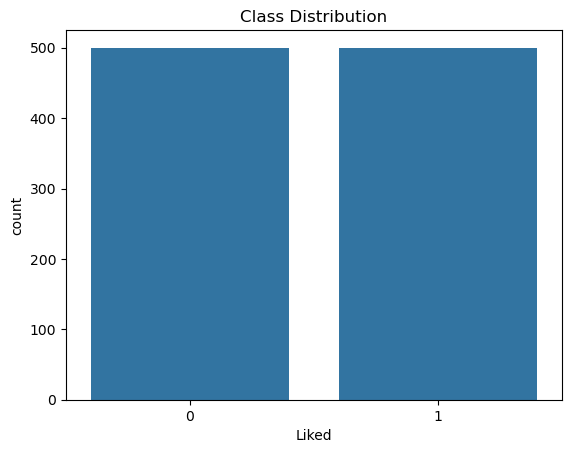

In [88]:
sns.countplot(x='Liked', data=df)
plt.title("Class Distribution")
plt.show()

In [89]:
df.columns = df.columns.str.strip()
df.columns

Index(['Review', 'Liked'], dtype='object')

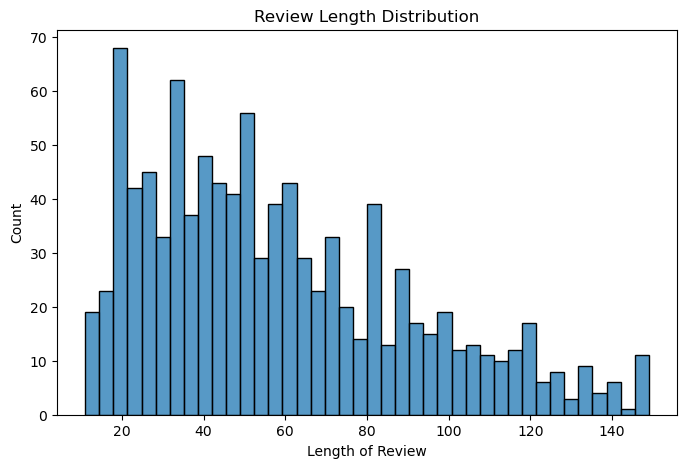

In [90]:
df['review_length'] = df['Review'].apply(len)

plt.figure(figsize=(8,5))
sns.histplot(df['review_length'], bins=40)
plt.title("Review Length Distribution")
plt.xlabel("Length of Review")
plt.ylabel("Count")
plt.show()

In [91]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [92]:
stop_words = set(stopwords.words('english'))

# Keep negation words (very important for sentiment)
negation_words = {"not", "no", "nor", "never"}
stop_words = stop_words - negation_words

def clean_text(text):
    
    text = text.lower()                          # lowercase
    text = re.sub(r'\d+', '', text)              # remove numbers
    text = re.sub(r'[^\w\s]', '', text)          # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()     # remove extra spaces
    
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(words)

In [93]:
df.columns = df.columns.str.strip()

In [94]:
df['clean_review'] = df['Review'].apply(clean_text)

df[['Review','clean_review']].head()

,Review,clean_review
0,Wow... Loved this place.,wow loved place
1,Crust is not good.,crust not good
2,Not tasty and the texture was just nasty.,not tasty texture nasty
3,Stopped by during the late May bank holiday of...,stopped late may bank holiday rick steve recom...
4,The selection on the menu was great and so wer...,selection menu great price


In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Improved TF-IDF
tfidf = TfidfVectorizer(
    max_features=6000,
    ngram_range=(1,3),
    min_df=2,
    max_df=0.85,
    sublinear_tf=True,
    norm='l2'
)

X = tfidf.fit_transform(df['clean_review'])
y = df['Liked']

In [96]:
X.shape

(1000, 1028)

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
from sklearn.naive_bayes import BernoulliNB

model = MultinomialNB(alpha=0.05)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

In [115]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [116]:
y_pred = model.predict(X_test)

In [117]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.81
Precision: 0.84375
Recall   : 0.7788461538461539
F1 Score : 0.81


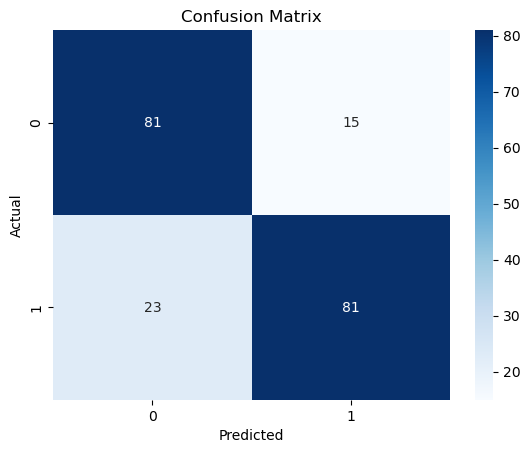

In [118]:
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [119]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        96
           1       0.84      0.78      0.81       104

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



In [120]:
import pickle

# Save trained model
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save TF-IDF vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

print("Model and Vectorizer saved successfully!")

Model and Vectorizer saved successfully!
